In [6]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review: Comparing Two Samples

In [2]:
def difference_of_means(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups
    """
    
    #table with the two relevant columns
    reduced = table.select(numeric_label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0) # group B smoking average - group A nonsmoking average

In [3]:
def one_simulated_difference(table, numeric_label, group_label):
    """
    Takes: name of table, column label of numerical variable,
    column label of group-label variable
    
    Returns: Difference of means of the two groups after shuffling labels
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(
        with_replacement = False).column(group_label) #grabbing shuffled column for smoking/nonsmoking
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(
        shuffled_table, numeric_label, 'Shuffled Label')   

In [4]:
births = Table.read_table('data/baby.csv')

In [5]:
births.group('Maternal Smoker', np.average)

Maternal Smoker,Birth Weight average,Gestational Days average,Maternal Age average,Maternal Height average,Maternal Pregnancy Weight average
False,123.085,279.874,27.5441,64.014,129.48
True,113.819,277.898,26.7364,64.1046,126.919


In [10]:
difference_of_means(births, 'Birth Weight','Maternal Smoker')
# below is our observed test statistic
# on average, babies from nonsmoking group were 9 ounces lighter than babies from smoking group

-9.266142572024918

In [16]:
# call function defined up above
# one sample, simulated under the null, shuffled labels (smoking/nonsmoking)
# that the average birth weight between two groups is more or less the same
# our births.csv could have been a sample that wasn't truly representative of the population
one_simulated_difference(births, 'Birth Weight','Maternal Smoker')

# what does this number mean below, in context of our null/alternative hypothesis and chosen test statistic
#" data science question"
# avg difference in birth weight between two groups was ~0.62 ounces
# Group B smoking average - Group A nonsmoking average
# average babies weight from smoking group were heavier

-0.01894967777320744

In [ ]:
# test statistic is average baby birth weight difference between smoking and nonsmoking
# what values support the null? big/small?
# what values support the alternative? big/small?

# in other words, what is the direction (left/right) of the alternative? (imagine reading a histogram of your simulated results)



# Randomized Control Experiment

In [17]:
botox = Table.read_table('data/bta.csv')
botox.show()

# control - placebo, saline
# treatment - botox
# for pain relief
# 1 - true for pain relief
# 0 - false for pain relief (no pain relief)

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [18]:
botox.pivot('Result', 'Group')  # cross-classify between two groups
# first argument - column headings (0 - no pain relief, 1 - pain relief)
# second argument - row headings (control, treatment)

Group,0.0,1.0
Control,14,2
Treatment,6,9


In [21]:
botox.group('Group', np.average) # cross-classify between two groups
# control group on average reported little to no pain relief (0.125 being close to 0, which means none)
# treatment group on averaged reported 0.6 on 0-1 scale of pain relief
# pain relief average was higher in treatment group, who received botox

Group,Result average
Control,0.125
Treatment,0.6


# Testing the Hypothesis

In [22]:
observed_diff = difference_of_means(botox, 'Result', 'Group')
observed_diff
# observed diff in pain relief scores (0 to 1) between two groups was 0.475
# treatment average - control average (positive scores are in favor of botox helping with pain relief, alternative)
# direction of alternative is RIGHT (histogram) useful for p-value calculation
# smaller scores (towards the left of histogram) point towards the null

0.475

In [34]:
one_simulated_difference(botox, 'Result', 'Group')
# we shuffle categorical label here (treatment/control)
# below is the simulated difference in pain relief scores between treatment/botox and control/saline

# are we able to simulate what actually happened?
# observed_diff

-0.3

In [36]:
simulated_diffs = make_array()

for i in np.arange(10000):
    sim_diff = one_simulated_difference(botox, 'Result', 'Group')
    simulated_diffs = np.append(simulated_diffs, sim_diff)

In [40]:
len(simulated_diffs) # collected all the treatment average pain relief - control average pain relief scores

10000

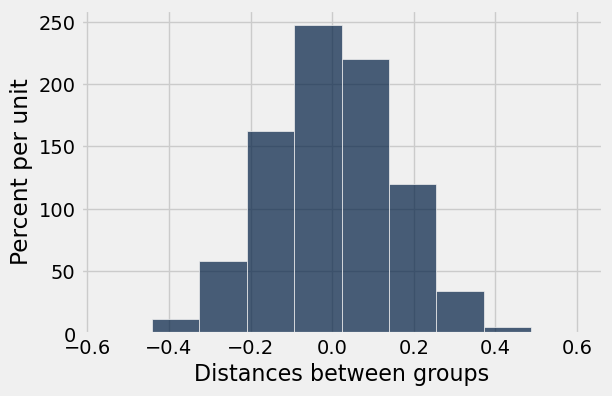

In [37]:
col_name = 'Distances between groups'
Table().with_column(col_name, simulated_diffs).hist(col_name)
# plot observed_diff on histogram for ease

In [44]:
# p-value
sum(simulated_diffs>= observed_diff)/len(simulated_diffs)

# how would you describe the number we found below
# to a doctor, say?

# remember, we are simulating under the null
# what does this p-value say about our null?
# ....i am questioning how good our null hypothesis is.....
#  data (randomized controlled experiment)
# and my experiment/simulations are not consistent


#0.63% we are able to simulate the observed stat and further in the direction of the alternative
# 0.63% < 5%, it's even less than 1%
# statistically significant
# we decide to reject the null

0.0063